## **1. Data Preprocessing**

In [110]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
import tabulate
pd.set_option("display.precision", 1)

Load data from dataset

In [111]:
tourist_df = pd.read_csv("https://raw.githubusercontent.com/Journie-by-Bangkit-C23-PS462/dataset_tourist/main/tourism_with_id_duration.csv")

user_df = pd.read_csv("https://raw.githubusercontent.com/Journie-by-Bangkit-C23-PS462/dataset_tourist/main/tourism_rating.csv")
tourist_df = tourist_df.drop(columns=['Time_Minutes', "Coordinate", "Description", "Rating"])
user_df = user_df.drop(columns=["Location"])
tourist_df_ori = tourist_df.copy()





#bygenre_df = pd.read_csv("./Dataset/content_bygenre_df.csv")
tourist_df

,Place_Id,Place_Name,Duration,Category,City,Price,Lat,Long,image_link
0,1,Monumen Nasional,150,Budaya,Jakarta,20000,-6.2,106.8,https://jakarta-tourism.sgp1.cdn.digitaloceans...
1,2,Kota Tua,120,Budaya,Jakarta,0,-6.1,106.8,https://img2.beritasatu.com/cache/beritasatu/9...
2,3,Dunia Fantasi,360,Taman Hiburan,Jakarta,270000,-6.1,106.8,https://kcic.co.id/lkapp/wp-content/uploads/20...
3,4,Taman Mini Indonesia Indah (TMII),180,Taman Hiburan,Jakarta,10000,-6.3,106.9,https://cdn1-production-images-kly.akamaized.n...
4,5,Atlantis Water Adventure,180,Taman Hiburan,Jakarta,94000,-6.1,106.8,https://s-light.tiket.photos/t/01E25EBZS3W0FY9...
...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,60,Budaya,Surabaya,2000,-7.4,112.7,https://kemuseum.org/wp-content/uploads/2020/0...
433,434,Taman Bungkul,60,Taman Hiburan,Surabaya,0,-7.3,112.7,https://upload.wikimedia.org/wikipedia/id/6/6e...
434,435,Taman Air Mancur Menari Kenjeran,90,Taman Hiburan,Surabaya,0,-7.3,112.8,https://gotripina.com/wp-content/uploads/2020/...
435,436,Taman Flora Bratang Surabaya,90,Taman Hiburan,Surabaya,0,-7.3,112.8,https://bappedalitbang.surabaya.go.id/ecobis/u...


In [112]:
train_user_all = user_df.drop(columns=["User_Id"])

In [113]:
train_user_all.head()
train_user = train_user_all

In [114]:
train_user_all = user_df.drop(columns=["User_Id"])

In [115]:
train_place = tourist_df.drop(columns=["City", "Price", "Lat", "Long"])

In [116]:
train_place.head()

,Place_Id,Place_Name,Duration,Category,image_link
0,1,Monumen Nasional,150,Budaya,https://jakarta-tourism.sgp1.cdn.digitaloceans...
1,2,Kota Tua,120,Budaya,https://img2.beritasatu.com/cache/beritasatu/9...
2,3,Dunia Fantasi,360,Taman Hiburan,https://kcic.co.id/lkapp/wp-content/uploads/20...
3,4,Taman Mini Indonesia Indah (TMII),180,Taman Hiburan,https://cdn1-production-images-kly.akamaized.n...
4,5,Atlantis Water Adventure,180,Taman Hiburan,https://s-light.tiket.photos/t/01E25EBZS3W0FY9...


In [117]:
tmp = train_user.copy()
user_table = tmp.pivot_table(index="Age", columns="Place_Id", values="Place_Ratings")
missing_cols = list(set(train_place.index) - set(user_table.columns))
for col in missing_cols:
    user_table[col] = np.nan
user_table = user_table[sorted(user_table.columns)]

### User Table
The User Table is a table that maps the rating based on the user's age.

In [118]:
user_table = pd.DataFrame(preprocessing.MinMaxScaler(feature_range=(0.5,1)).fit_transform(user_table.values),
columns=user_table.columns, index=user_table.index)

user_table

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


Place_Id,0,1,2,3,4,5,6,7,8,9,...,428,429,430,431,432,433,434,435,436,437
Age,,,,,,,,,,,,,,,,,,,,,
18,NaN,0.9,0.6,0.5,0.9,1.0,NaN,0.5,0.9,NaN,...,0.9,0.9,0.9,1.0,NaN,0.9,1.0,0.5,0.8,1.0
19,NaN,1.0,1.0,0.9,NaN,NaN,0.5,0.9,0.8,NaN,...,NaN,NaN,NaN,0.5,0.9,1.0,0.7,NaN,0.6,1.0
20,NaN,0.7,0.8,0.9,0.7,1.0,0.8,NaN,0.5,0.8,...,0.9,NaN,0.9,NaN,NaN,0.9,1.0,0.8,1.0,0.6
21,NaN,1.0,0.9,0.9,0.9,1.0,NaN,0.8,1.0,0.5,...,0.5,NaN,1.0,0.6,0.7,0.7,0.7,NaN,NaN,0.9
22,NaN,NaN,NaN,0.8,NaN,NaN,1.0,0.8,0.5,0.9,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,0.5,0.9,0.6,NaN,NaN,NaN,0.8,...,NaN,NaN,0.9,0.6,NaN,0.8,NaN,0.9,0.9,1.0
24,NaN,NaN,0.8,NaN,0.6,0.9,NaN,0.6,0.9,NaN,...,0.5,0.6,0.9,0.7,1.0,0.9,0.5,0.9,NaN,0.7
25,NaN,1.0,1.0,NaN,1.0,0.9,NaN,NaN,NaN,0.5,...,1.0,0.8,0.8,0.8,0.7,0.8,1.0,0.6,NaN,0.7
26,NaN,0.6,0.5,NaN,0.9,NaN,0.6,NaN,0.7,0.8,...,NaN,1.0,0.9,NaN,0.9,NaN,NaN,0.9,0.5,NaN


## 2. Model Training and Building


Build a layer for Artificial Neural Network using Keras Layers from Tensorflow

- We use 2 Artificial Neural Network, first is neural network for user preference (age), and the second is neural network for place (tourism destination)
- Each of Artificial Neural Networks contains 3 hidden layers
- The output layers of the artificial neural networks is the the dot product of user preference network and place neural networ. This output layers will generate the y_hat score (predicted place y ratings by user x)

In [119]:
embeddings_size = 100
usr, plc = 40, user_table.shape[1]


users_input = tf.keras.layers.Input(name="users_input", shape=(1,))
users_embeded = tf.keras.layers.Embedding(name="users_embeded", input_dim=usr+1, output_dim=embeddings_size)(users_input)
users = tf.keras.layers.Reshape(name='users', target_shape=(embeddings_size,))(users_embeded)

places_input = tf.keras.layers.Input(name="places_input", shape=(1,))
places_embeded = tf.keras.layers.Embedding(name="places_embeded", input_dim=plc, output_dim=embeddings_size)(places_input)
places = tf.keras.layers.Reshape(name='places', target_shape=(embeddings_size,))(places_embeded)


dot_product = tf.keras.layers.Dot(name="dot_product", normalize=True, axes=1)([users, places])

y_output = tf.keras.layers.Dense(1, activation='linear', name='output')(dot_product)



Training the model using:
- ADAM optimizer
- Caluclate training and validation erorr (MSE and MAE)
- 20% data is used for validation and 80% data for training the model

In [120]:
model = tf.keras.Model(inputs=[users_input, places_input], outputs=y_output)
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
training = model.fit(x=[train_user["Age"], train_user["Place_Id"]], y=train_user["Place_Ratings"], epochs=50, batch_size=128, shuffle=True,  validation_split=0.2)

Epoch 1/50
63/63 [==============================] - 1s 8ms/step - loss: 10.7197 - mse: 10.7197 - mae: 2.9688 - val_loss: 9.2101 - val_mse: 9.2101 - val_mae: 2.6764
Epoch 2/50
63/63 [==============================] - 0s 4ms/step - loss: 7.1257 - mse: 7.1257 - mae: 2.2957 - val_loss: 5.2756 - val_mse: 5.2756 - val_mae: 1.8860
Epoch 3/50
63/63 [==============================] - 0s 4ms/step - loss: 4.3951 - mse: 4.3951 - mae: 1.7403 - val_loss: 3.7389 - val_mse: 3.7389 - val_mae: 1.5943
Epoch 4/50
63/63 [==============================] - 0s 5ms/step - loss: 3.4529 - mse: 3.4529 - mae: 1.5219 - val_loss: 3.1898 - val_mse: 3.1898 - val_mae: 1.4604
Epoch 5/50
63/63 [==============================] - 0s 4ms/step - loss: 3.0441 - mse: 3.0441 - mae: 1.4129 - val_loss: 2.9011 - val_mse: 2.9011 - val_mae: 1.4015
Epoch 6/50
63/63 [==============================] - 0s 4ms/step - loss: 2.8011 - mse: 2.8011 - mae: 1.3743 - val_loss: 2.7128 - val_mse: 2.7128 - val_mae: 1.3801
Epoch 7/50
63/63 [========

In [121]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 users_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 places_input (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 users_embeded (Embedding)      (None, 1, 100)       4100        ['users_input[0][0]']            
                                                                                                  
 places_embeded (Embedding)     (None, 1, 100)       43800       ['places_input[0][0]']           
                                                                                            

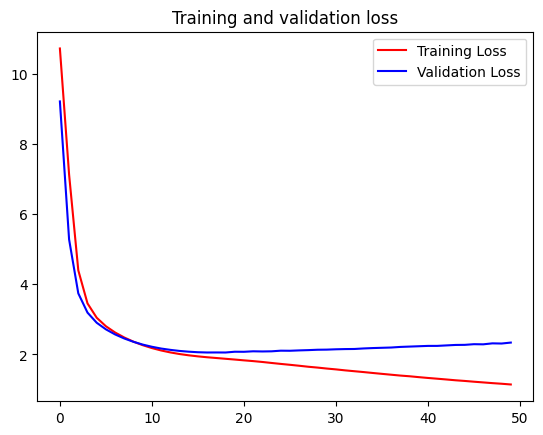

In [122]:
import matplotlib.pyplot as plt

# Plot the model results
loss = training.history['loss']
val_loss = training.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We chose 50 epochs because this model is neither underfitting nor overfitting. If we continue the training process, the training loss will decrease, but the validation loss will increase. This would lead to overfitting.

## 3. Model Testing and Prediction



In [123]:

# Define the value you want to repeat
value = 30

# Create a column with 200 rows of the same value
column = pd.Series([value] * 10000, name='Age')

# Create an empty DataFrame
df = pd.DataFrame()

# Concatenate the column with the empty DataFrame
df = pd.concat([df, column], axis=1)

In [124]:
test_user = df
test_user["Place_Id"] = train_user["Place_Id"]
test_user

,Age,Place_Id
0,30,179
1,30,344
2,30,5
3,30,373
4,30,101
...,...,...
9995,30,425
9996,30,64
9997,30,311
9998,30,279


In [125]:
model = training.model
test_user["yhat"] = model.predict([test_user["Age"], train_user["Place_Id"]])
test_user

313/313 [==============================] - 1s 1ms/step


,Age,Place_Id,yhat
0,30,179,3.2
1,30,344,2.1
2,30,5,3.2
3,30,373,3.1
4,30,101,3.8
...,...,...,...
9995,30,425,2.9
9996,30,64,2.1
9997,30,311,2.2
9998,30,279,3.1


In [126]:
def mean_reciprocal_rank(y_test, predicted):
    score = []
    for product in y_test:
        mrr = 1 / (list(predicted).index(product) + 1) if product in predicted else 0
        score.append(mrr)
    return np.mean(score)

In [127]:
hasil = test_user[["Place_Id", "Age", "yhat"]].merge(
       tourist_df[["Place_Name", "Category", "City"]], left_on="Place_Id",
       right_index=True
).sort_values("yhat", ascending=False)

In [128]:

city = "Jakarta"
category = ["Budaya", "Taman Hiburan", "Tempat Ibadah"]


filtered_hasil = hasil[ (hasil["City"] == city) & (hasil["Category"].isin(category))]
#filtered_hasil = hasil[ (hasil["City"] == city)]
filtered_hasil.drop_duplicates(subset=["Place_Name"], inplace=True)
filtered_hasil

<ipython-input-128-0dcf633dbc9c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hasil.drop_duplicates(subset=["Place_Name"], inplace=True)


,Place_Id,Age,yhat,Place_Name,Category,City
6684,58,30,3.8,Museum Sumpah Pemuda,Budaya,Jakarta
4446,36,30,3.6,Bumi Perkemahan Cibubur,Taman Hiburan,Jakarta
1617,35,30,3.6,Skyrink - Mall Taman Anggrek,Taman Hiburan,Jakarta
8471,15,30,3.4,Jembatan Kota Intan,Budaya,Jakarta
6983,61,30,3.4,Taman Legenda Keong Emas,Taman Hiburan,Jakarta
2502,32,30,3.4,Taman Suropati,Taman Hiburan,Jakarta
7634,19,30,3.4,Museum Taman Prasasti,Budaya,Jakarta
2779,44,30,3.3,Jakarta Aquarium dan Safari,Taman Hiburan,Jakarta
8662,60,30,3.2,Tugu Proklamasi,Budaya,Jakarta
7924,5,30,3.2,Taman Impian Jaya Ancol,Taman Hiburan,Jakarta


In [129]:
#model.save('plan_model.h5')

##4. Create Recommendation Route for Users

In [131]:
!pip install python_tsp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.27.1, but you have requests 2.31.0 which is incompatible.


In [132]:
from keras.models import load_model
from scipy.spatial import distance_matrix
import pandas as pd
from python_tsp.heuristics import solve_tsp_simulated_annealing

In [133]:
#For example, user want to input recommendation for 3 day
total_day = 3

###Load model (recommendation model)

In [ ]:
#model = load_model("plan_model.h5")

###Create Dataframe for the user input

In [143]:
tourist_df = pd.read_csv("https://raw.githubusercontent.com/Journie-by-Bangkit-C23-PS462/dataset_tourist/main/tourism_with_id_duration.csv")
column = pd.Series([value] * 437, name='Age')
df = pd.DataFrame()
df = pd.concat([df, column], axis=1)
test_user = df
test_user["Place_Id"] = tourist_df["Place_Id"]
test_user["score"] = model.predict([test_user["Age"], tourist_df["Place_Id"]])

14/14 [==============================] - 0s 2ms/step


###Merge the result with the dataset

In [144]:
hasil = test_user[["Place_Id", "score"]].merge(
        tourist_df[["Place_Name", "Category", "City", "Lat", "Long"]], left_on="Place_Id",
        right_index=True
    ).sort_values("score", ascending=False)

####Filter the result based on the user input

In [145]:
jumlah_data = total_day * 5
filtered_hasil = hasil[ (hasil["City"] == city) & (hasil["Category"].isin(category))]
filtered_hasil.drop_duplicates(subset=["Place_Name"], inplace=True)
final_result = filtered_hasil[:jumlah_data]

<ipython-input-145-8f0bb0720f94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hasil.drop_duplicates(subset=["Place_Name"], inplace=True)


###Create the route based on the result

In [146]:
matrix = final_result[["Lat", "Long"]].values
d = distance_matrix(matrix, matrix)
permutation_distance, distance = solve_tsp_simulated_annealing(d)

city_order = final_result.iloc[permutation_distance]["Place_Id"].values
route = []
for i in permutation_distance:
    route.append(final_result.iloc[i]["Place_Id"])
    route.append(final_result.iloc[0]["Place_Id"])
    route_df = pd.DataFrame(route, columns=["Place_Id"])
    result_ftp = route_df[["Place_Id"]].merge(
      tourist_df[["Place_Name", "Category", "City", "Lat", "Long", "Price", "Duration", "Description", "image_link"]], left_on="Place_Id",
      right_index=True
)

In [147]:
result_ftp

,Place_Id,Place_Name,Category,City,Lat,Long,Price,Duration,Description,image_link
0,58,Museum Sumpah Pemuda,Budaya,Jakarta,-6.2,106.8,2000,60,Museum Sumpah Pemuda adalah sebuah museum seja...,https://encrypted-tbn0.gstatic.com/images?q=tb...
1,58,Museum Sumpah Pemuda,Budaya,Jakarta,-6.2,106.8,2000,60,Museum Sumpah Pemuda adalah sebuah museum seja...,https://encrypted-tbn0.gstatic.com/images?q=tb...
3,58,Museum Sumpah Pemuda,Budaya,Jakarta,-6.2,106.8,2000,60,Museum Sumpah Pemuda adalah sebuah museum seja...,https://encrypted-tbn0.gstatic.com/images?q=tb...
5,58,Museum Sumpah Pemuda,Budaya,Jakarta,-6.2,106.8,2000,60,Museum Sumpah Pemuda adalah sebuah museum seja...,https://encrypted-tbn0.gstatic.com/images?q=tb...
7,58,Museum Sumpah Pemuda,Budaya,Jakarta,-6.2,106.8,2000,60,Museum Sumpah Pemuda adalah sebuah museum seja...,https://encrypted-tbn0.gstatic.com/images?q=tb...
9,58,Museum Sumpah Pemuda,Budaya,Jakarta,-6.2,106.8,2000,60,Museum Sumpah Pemuda adalah sebuah museum seja...,https://encrypted-tbn0.gstatic.com/images?q=tb...
11,58,Museum Sumpah Pemuda,Budaya,Jakarta,-6.2,106.8,2000,60,Museum Sumpah Pemuda adalah sebuah museum seja...,https://encrypted-tbn0.gstatic.com/images?q=tb...
13,58,Museum Sumpah Pemuda,Budaya,Jakarta,-6.2,106.8,2000,60,Museum Sumpah Pemuda adalah sebuah museum seja...,https://encrypted-tbn0.gstatic.com/images?q=tb...
15,58,Museum Sumpah Pemuda,Budaya,Jakarta,-6.2,106.8,2000,60,Museum Sumpah Pemuda adalah sebuah museum seja...,https://encrypted-tbn0.gstatic.com/images?q=tb...
17,58,Museum Sumpah Pemuda,Budaya,Jakarta,-6.2,106.8,2000,60,Museum Sumpah Pemuda adalah sebuah museum seja...,https://encrypted-tbn0.gstatic.com/images?q=tb...


###Create the recommendation based on the route

In [150]:
    result_ftp.drop_duplicates(subset=["Place_Name"], inplace=True)
    duration_temp = 0
    start = 0
    mid = 0
    end = 0
    for i in range(jumlah_data):
        duration_temp += result_ftp.iloc[i]["Duration"]
        if ((duration_temp >= 240) & (start == 0)):
            start = i + 1
            duration_temp = 0
        if ((duration_temp >= 240) & (mid == 0) & (total_day >= 2)):
            mid = i + 1
            duration_temp = 0
        if ((duration_temp >= 240) & (end == 0) & (total_day >= 3)):
            end = i + 1
            break

    day_one = result_ftp[:start]
    day_two = result_ftp[start:mid]
    day_three = result_ftp[mid:end]
    recommendation = day_one.to_dict('records'), day_two.to_dict('records'), day_three.to_dict('records')

In [151]:
recommendation

([{'Place_Id': 58,
   'Place_Name': 'Museum Sumpah Pemuda',
   'Category': 'Budaya',
   'City': 'Jakarta',
   'Lat': -6.1838388,
   'Long': 106.8430507,
   'Price': 2000,
   'Duration': 60,
   'Description': 'Museum Sumpah Pemuda adalah sebuah museum sejarah perjuangan kemerdekaan Republik Indonesia yang berada di Jalan Kramat Raya No. 106, Jakarta Pusat dan dikelola oleh Kementerian Pendidikan dan Kebudayaan Republik Indonesia. Museum ini dibuka untuk umum, setiap hari Selasa sampai dengan Jumat dari pukul 08.00 hingga 16.00 UTC+7, setiap Sabtu dan Minggu pada pukul 08.00—16.00 WIB, dan setiap hari Senin dan hari besar nasional, museum ini ditutup untuk umum.\\nMuseum ini memiliki koleksi foto dan benda-benda yang berhubungan dengan sejarah Sumpah Pemuda 1928, serta kegiatan-kegiatan dalam pergerakan nasional kepemudaan Indonesia. Museum Sumpah Pemuda ini didirikan berdasarkan SK Gubernur DKI Jakarta pada tahun 1972 dan menjadi benda cagar budaya nasional.\r',
   'image_link': 'https: